In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

### Raw data resource for this exercise:
Schwee, J.H., et al.: Room-level occupant counts and environmental quality from heterogeneous sensing modalities
in a smart building. Sci. Data 6(1), 1–11 (2019)

If you want to build the merged dataset, download the raw data dataset and follow the steps under "Building Merged Dataset" section.
Please note that the merged dataset used in the exercise is already included in the repository and you may skip the building steps and 
proceed to "Ready to use dataset" section.

## Building Merged Dataset

In [ ]:

def merge_time(input_df, data_column, interval = 30, time_filter = True):
    input_df['merged_time'] = input_df.apply(lambda row: str(row['year']) +
                         str(row['month']).zfill(2) + 
                         str(row['day']).zfill(2) +
                         row['time'][:2] + 
                         str(int(row['time'][3:5]) // interval).zfill(2), axis=1)
    
    if time_filter:
        drop_index = input_df[input_df['time'].map(lambda row: int(row[:2]) < 6 or int(row[:2]) > 14)].index
        input_df.drop(drop_index , inplace=True)
    
    
    return input_df.groupby(['merged_time'])[data_column].mean()



room = 1
occupancy_file = "Dataset/filleddata/occupant_count_room_%d.csv"%room
co2_file = "Dataset/filleddata/co2_room_%d.csv"%room
temperature_file = "Dataset/filleddata/temperature_room_%d.csv"%room
illuminance_file = "Dataset/filleddata/Illuminance_room_%d.csv"%room
humidity_file = "Dataset/filleddata/humidity_room_%d.csv"%room

occ_columns = ['year', 'month', 'time', 'day', 'workday', 'occupancy']
co2_columns = ['year', 'month', 'time', 'day', 'workday', 'co2']
tmp_columns = ['year', 'month', 'time', 'day', 'workday', 'temperature']
ill_columns = ['year', 'month', 'time', 'day', 'workday', 'illuminance']
hum_columns = ['year', 'month', 'time', 'day', 'workday', 'humidity']

occ_df = pd.read_csv(occupancy_file, names=occ_columns, skiprows=1)
co2_df = pd.read_csv(co2_file, names=co2_columns, skiprows=1)
tmp_df = pd.read_csv(temperature_file, names=tmp_columns, skiprows=1)
ill_df = pd.read_csv(illuminance_file, names=ill_columns, skiprows=1)
hum_df = pd.read_csv(humidity_file, names=hum_columns, skiprows=1)
    
    
occ_grouped = merge_time(occ_df, 'occupancy')
co2_grouped = merge_time(co2_df, 'co2')
tmp_grouped = merge_time(tmp_df, 'temperature')
ill_grouped = merge_time(ill_df, 'illuminance')
hum_grouped = merge_time(hum_df, 'humidity')
    
    
dataset = pd.concat([occ_grouped, co2_grouped, tmp_grouped, ill_grouped, hum_grouped], axis=1, sort=False)
dataset['occupancy'] = dataset['occupancy'].round()
dataset.to_csv('room.csv', index=False)

# Ready to use Dataset 

In [3]:
room_df = pd.read_csv('room.csv')

In [4]:
room_df.head()

,occupancy,co2,temperature,illuminance,humidity
0,1.0,464.159999,22.299999,97.370665,34.575165
1,13.0,485.802663,21.766667,83.944000,36.470587
2,65.0,489.600006,22.033334,123.719999,35.816993
3,73.0,503.733337,22.200001,355.634665,34.901962
4,51.0,603.093341,22.013333,391.914669,37.189542


In [ ]:
room_df.info()

In [ ]:
room_df.columns

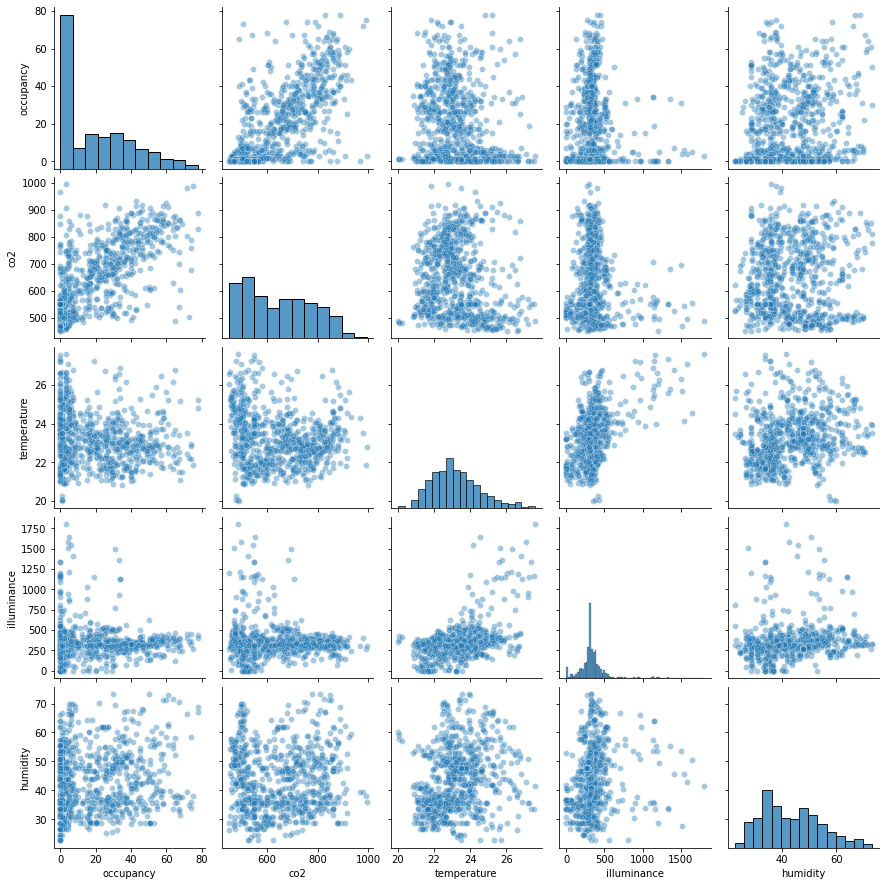

In [5]:
columns = ['occupancy', 'co2', 'temperature', 'illuminance', 'humidity']
sns.pairplot(room_df[columns], diag_kind='hist', plot_kws=dict(alpha=0.4))

We a correlation matrix to quantify the relationships between the variables. This correlation matrix is a rescaled version of the covariance matrix, computed from standardize features.

In [6]:
cm = np.corrcoef(room_df.values.T)

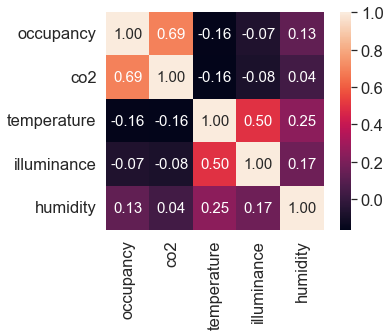

In [7]:
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=columns,
                xticklabels=columns)

To fit a regression model, the features of interest is CO2 which has a high correlation with the target variable (occupancy)

# Knowledge Extraction

In [2]:
tables = pd.read_html('https://en.wikipedia.org/wiki/Provinces_of_Iran')

In [3]:
df = tables[1]
df.head()

,Province,Capital,"Population, 2016[4]",Population 2011,Annual Population Growth Rate (2006-2016),Population of the capital city,Capital's share of provincial population,Land Area (km2),Population Density (people per km2),Shahrestans (counties),"Life expectancy, male[5]","Life expectancy, female[5]",Notes,Map
0,Alborz,Karaj,2712400.0,2412513.0,3.21%,1592492.0,58.71%,5833.0,465.01,4.0,74.4,78.0,"Until 23 June 2010, Alborz was part of Tehran ...",NaN
1,Ardabil,Ardabil,1270420.0,1248488.0,0.50%,529374.0,41.67%,17800.0,71.37,9.0,71.3,75.6,"Until 1993, Ardabil was part of East Azerbaija...",NaN
2,"Azerbaijan, East",Tabriz,3909652.0,3724620.0,1.08%,1558693.0,39.87%,45650.0,85.64,19.0,72.5,75.9,NaN,NaN
3,"Azerbaijan, West",Urmia,3265219.0,3080576.0,1.53%,793000.0,24.29%,37437.0,87.22,14.0,71.6,76.3,During the Pahlavi Dynasty Urmia was known as ...,NaN
4,Bushehr,Bushehr,1163400.0,1032949.0,3.43%,223504.0,19.21%,22743.0,51.15,9.0,71.0,73.5,"Originally part of Fars province. Until 1977, ...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Province                                   32 non-null     object 
 1   Capital                                    32 non-null     object 
 2   Population, 2016[4]                        32 non-null     float64
 3   Population 2011                            32 non-null     float64
 4   Annual Population Growth Rate (2006-2016)  32 non-null     object 
 5   Population of the capital city             32 non-null     float64
 6   Capital's share of provincial population   32 non-null     object 
 7   Land Area (km2)                            31 non-null     float64
 8   Population Density (people per km2)        32 non-null     object 
 9   Shahrestans (counties)                     32 non-null     float64
 10  Life expectancy, male[5]    

In [5]:
column_map = {
    'Population 2011': 'Population_2011',
    'Population, 2016[4]': 'Population_2016',
    'Annual Population Growth Rate (2006-2016)': 'Polulation_growth',
    'Population Density (people per km2)': 'Population_density',
    'Capital\'s share of provincial population': 'Capital_share',
    'Life expectancy, male[5]': 'Life_male',
    'Life expectancy, female[5]': 'Life_female',
}
df = df.rename(columns=column_map)

In [6]:
df.head()

,Province,Capital,Population_2016,Population_2011,Polulation_growth,Population of the capital city,Capital_share,Land Area (km2),Population_density,Shahrestans (counties),Life_male,Life_female,Notes,Map
0,Alborz,Karaj,2712400.0,2412513.0,3.21%,1592492.0,58.71%,5833.0,465.01,4.0,74.4,78.0,"Until 23 June 2010, Alborz was part of Tehran ...",NaN
1,Ardabil,Ardabil,1270420.0,1248488.0,0.50%,529374.0,41.67%,17800.0,71.37,9.0,71.3,75.6,"Until 1993, Ardabil was part of East Azerbaija...",NaN
2,"Azerbaijan, East",Tabriz,3909652.0,3724620.0,1.08%,1558693.0,39.87%,45650.0,85.64,19.0,72.5,75.9,NaN,NaN
3,"Azerbaijan, West",Urmia,3265219.0,3080576.0,1.53%,793000.0,24.29%,37437.0,87.22,14.0,71.6,76.3,During the Pahlavi Dynasty Urmia was known as ...,NaN
4,Bushehr,Bushehr,1163400.0,1032949.0,3.43%,223504.0,19.21%,22743.0,51.15,9.0,71.0,73.5,"Originally part of Fars province. Until 1977, ...",NaN


In [7]:
df = df[['Province', 'Population_2016',	'Population_2011', 'Polulation_growth', 'Capital_share', 'Population_density', 'Life_male', 'Life_female']]
df = df[0:31]

In [8]:
df.head()

,Province,Population_2016,Population_2011,Polulation_growth,Capital_share,Population_density,Life_male,Life_female
0,Alborz,2712400.0,2412513.0,3.21%,58.71%,465.01,74.4,78.0
1,Ardabil,1270420.0,1248488.0,0.50%,41.67%,71.37,71.3,75.6
2,"Azerbaijan, East",3909652.0,3724620.0,1.08%,39.87%,85.64,72.5,75.9
3,"Azerbaijan, West",3265219.0,3080576.0,1.53%,24.29%,87.22,71.6,76.3
4,Bushehr,1163400.0,1032949.0,3.43%,19.21%,51.15,71.0,73.5


In [9]:
df = df.replace({'%': ''}, regex=True)
df[['Polulation_growth', 'Capital_share', 'Population_density']] = df[['Polulation_growth', 'Capital_share', 'Population_density']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Province            31 non-null     object 
 1   Population_2016     31 non-null     float64
 2   Population_2011     31 non-null     float64
 3   Polulation_growth   31 non-null     float64
 4   Capital_share       31 non-null     float64
 5   Population_density  31 non-null     float64
 6   Life_male           31 non-null     float64
 7   Life_female         31 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.1+ KB


In [10]:
df.head()

,Province,Population_2016,Population_2011,Polulation_growth,Capital_share,Population_density,Life_male,Life_female
0,Alborz,2712400.0,2412513.0,3.21,58.71,465.01,74.4,78.0
1,Ardabil,1270420.0,1248488.0,0.50,41.67,71.37,71.3,75.6
2,"Azerbaijan, East",3909652.0,3724620.0,1.08,39.87,85.64,72.5,75.9
3,"Azerbaijan, West",3265219.0,3080576.0,1.53,24.29,87.22,71.6,76.3
4,Bushehr,1163400.0,1032949.0,3.43,19.21,51.15,71.0,73.5


In [ ]:
list(df.columns)

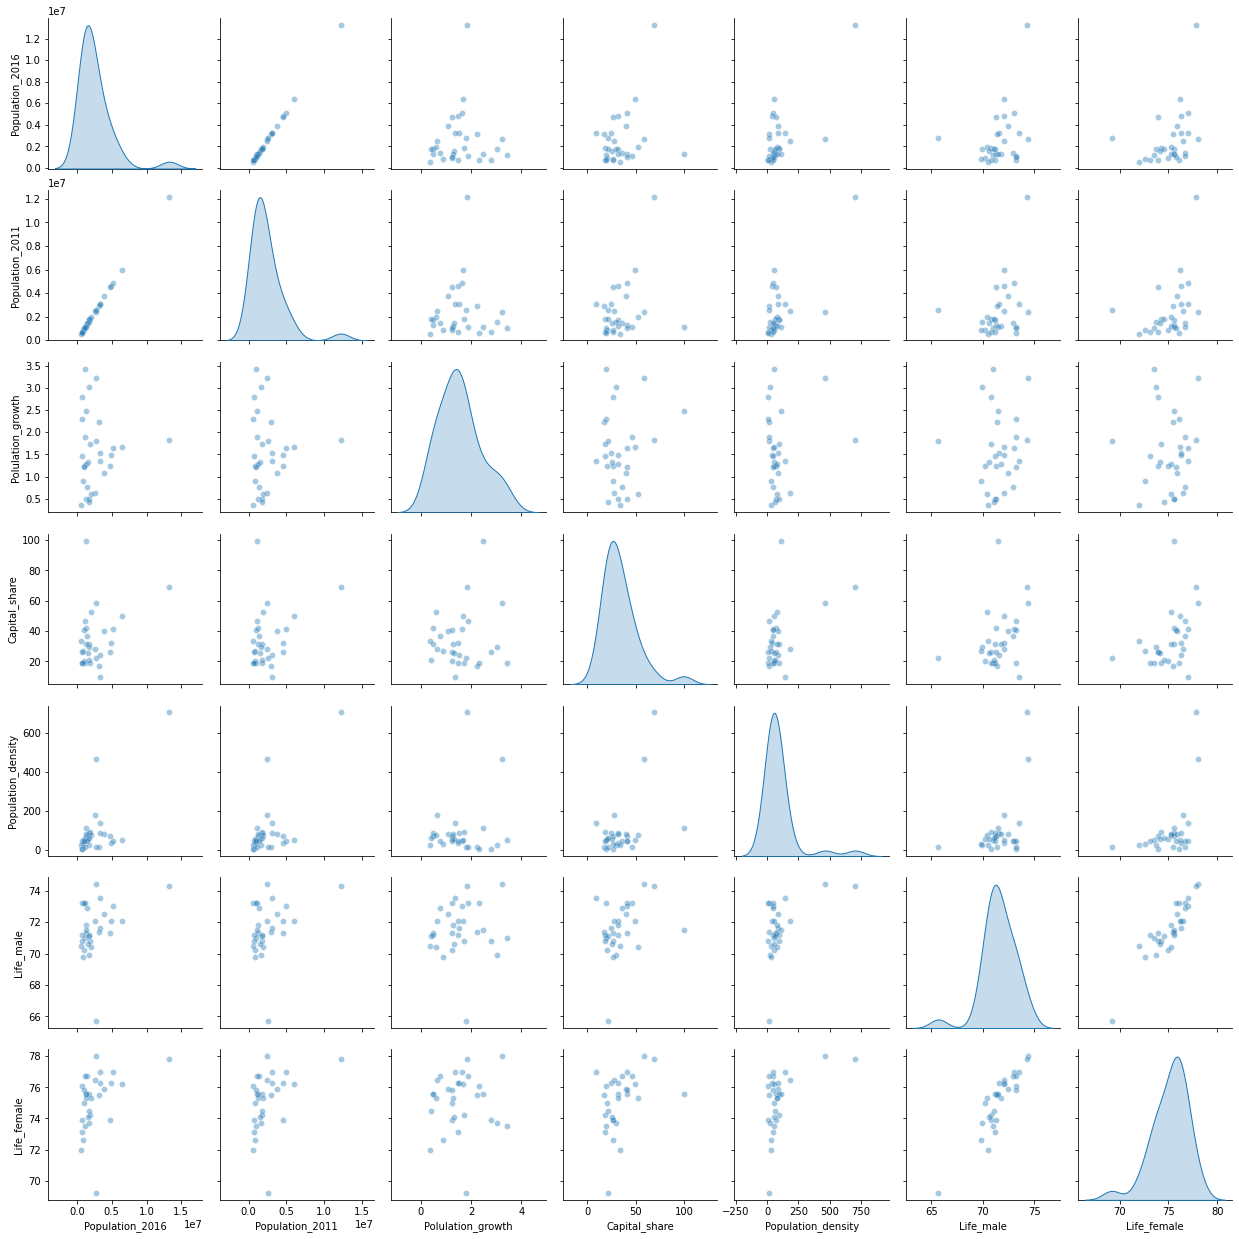

In [11]:
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset
sns.pairplot(df[['Population_2016', 'Population_2011', 'Polulation_growth', 'Capital_share', 'Population_density', 'Life_male',
 'Life_female']], diag_kind='kde', plot_kws=dict(alpha=0.4))